# 개요
- 일정 기간의 온라인 채널에서 판매된 제품량으로 분석 진행
- 데이터를 통해 인사이트를 도출

## DDA

In [2]:
import pandas as pd

In [14]:
import seaborn as sns
import matplotlib as plt

In [12]:
df_sales = pd.read_csv('../data/sales.csv')
df_info = pd.read_csv('../data/product_info.csv')
df_keyword = pd.read_csv('../data/brand_keyword_cnt.csv')


In [13]:
df_info

,제품,제품특성
0,B002-03509-00001,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...
1,B002-02376-00001,700mg x 28정
2,B002-03735-00001,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...
3,B002-03735-00003,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...
4,B002-02769-00001,HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):...
...,...,...
12773,B002-01994-00001,형태:액상형 구성:리필 등급:1종 용도:식기 용도:과일 용도:야채 용도:조리기구 용...
12774,B002-02600-00002,헤어타입:모든 모발용 주요제품특징:머릿결개선 세부제품특징:촉촉함(수분공급) 세부제품...
12775,B002-02372-00095,사용대상:여성용 타입:일자형 흡수량:20ml :1팩 32개
12776,B002-01318-00002,피부타입:모든피부용 향계열:무향 주요제품특징:촉촉함(수분공급) 주요제품특징:풍부한 ...


- 데이터를 살펴본 결과, 각 제품에 대한 설명이 특징에 대한 설명만 나와있음
- 각 데이터의 라벨링이 되어있지 않아 세세한 분석을 위해서는 군집화를 통해 임의로 지정해야할 듯

## 토큰화
- Okt사용

In [16]:
# 조사, 어미, 구두점 같은 것을 제거
def okt_clean(text):
    from konlpy.tag import Okt
    okt = Okt()
    clean_text = []
    for word in okt.pos(text, stem=True):
        if word[1] not in ['Josa', 'Eomi', 'Punctuation']:
            clean_text.append(word[0])

    return " ".join(clean_text)

In [17]:
df_info['new_text'] = df_info['제품특성'].apply(okt_clean)

In [34]:
df_info[11860:11880]

,제품,제품특성,new_text
11860,B002-02822-00004,매수:80매 특징:무자극 특징:보습효과 정수과정:9단계정수 :6팩,매수 80 매 특징 무자 극 특징 보습 효과 정수 과정 9 단 계정수 6 팩
11861,B002-03353-00001,피부타입:모든피부용 주요제품특징:촉촉함(수분공급) 주요제품특징:흡수력 세부제품특징:...,피부 타입 모든 피부 용 주요 제품 특징 촉촉하다 수분 공급 주요 제품 특징 흡수 ...
11862,B002-01651-00003,세트구성:샴푸 세트구성:헤어팩 주요제품특징:머릿결개선 주요제품특징:촉촉함(수분공급)...,세트 구성 샴푸 세트 구성 헤어 팩 주요 제품 특징 머릿결 개선 주요 제품 특징 촉...
11863,B002-01250-00005,"헤어타입:모든 모발용 용량:100ml(g) :본품, 헤어타입:모든 모발용 주요제품특...",헤어 타입 모든 모발 용 용량 100 ml g 본 품 헤어 타입 모든 모발 용 주요...
11864,B002-02585-00050,헤어타입:모든 모발용 주요제품특징:머릿결개선 주요제품특징:향 세부제품특징:윤기부여 ...,헤어 타입 모든 모발 용 주요 제품 특징 머릿결 개선 주요 제품 특징 향 세 부제품...
11865,B002-03221-00013,"주요제품특징:세팅력 세부제품특징:고정력 용량:150ml(g) :1개, 헤어타입헤어타...",주요 제품 특징 세 팅 력 세 부제품 특징 고정력 용량 150 ml g 1 개 헤어...
11866,B002-00933-00001,"헤어타입:모든 모발용 제품형태:크림형 용량:100ml(g) :1개, 헤어타입:모든 ...",헤어 타입 모든 모발 용 제품 형태 크림 형 용량 100 ml g 1 개 헤어 타입...
11867,B002-00434-00153,헤어타입:모든 모발용 세부제품특징:영양공급 세부제품특징:모발영양 용량:330ml(g...,헤어 타입 모든 모발 용 세 부제품 특징 영양 공급 세 부제품 특징 모발 영양 용량...
11868,B002-02804-00056,주요제품특징:촉촉함(수분공급) 세부제품특징:윤기부여 세부제품특징:영양공급 :1개 1...,주요 제품 특징 촉촉하다 수분 공급 세 부제품 특징 윤기 부여 세 부제품 특징 영양...
11869,B002-00430-00011,타입:일반샴푸 제품형태:리퀴드형 세부제품특징:촉촉함(수분공급) 향계열:기타향 :1개...,타입 일반 샴푸 제품 형태 리 퀴드 형 세 부제품 특징 촉촉하다 수분 공급 향 계열...


In [33]:
# 문장 정리 및 정재작업
def solve_text(text):
    change_dict = {
        '세 부제품' : '세부제품', 
        '세 팅 력' : '세팅력',
        '액 상형' : '액상형',
        '두 번' : '두번',
        '하다 번' : '한번',
    }
    for i in change_dict:
        text = text.replace(i,change_dict[i])
    return text

In [35]:
df_info['new_text'] = df_info['new_text'].apply(solve_text)

## 벡터화
-  TF-IDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVectorizer = TfidfVectorizer(max_df=0.95, min_df=2)

In [38]:
tfidf_matrix = tfidfVectorizer.fit_transform(df_info['new_text'])

## 클러스터링
- kmean 사용

In [39]:
from sklearn.cluster import KMeans

### 최적 k값 찾기
- silhouette 사용

In [40]:
from sklearn.metrics import silhouette_score

In [44]:
k_range = range(2,100)

best_n = -1
best_score = -1

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    clusters = kmeans.predict(tfidf_matrix)

    score = silhouette_score(tfidf_matrix,clusters)
    print('k :',k,'score :',score)

    if score > best_score:
        best_n = k
        best_score = score

print('best n :', best_n, 'best score :', best_score)

k : 2 score : 0.06852189552034038
k : 3 score : 0.12179699370654676
k : 4 score : 0.13089279655136257
k : 5 score : 0.14277555964405797
k : 6 score : 0.14834558567007397
k : 7 score : 0.13434615762210758
k : 8 score : 0.1731635950226688
k : 9 score : 0.1814589893477255
k : 10 score : 0.1923478638773116
k : 11 score : 0.18970858459273116
k : 12 score : 0.17275258556947734
k : 13 score : 0.15950253993123717
k : 14 score : 0.16081089277806038
k : 15 score : 0.16542191323442987
k : 16 score : 0.16955042061866435
k : 17 score : 0.1584319134062908
k : 18 score : 0.1620444612592583
k : 19 score : 0.16493552259233651
k : 20 score : 0.1686711110735137
k : 21 score : 0.17558920412959678
k : 22 score : 0.17919923887816033
k : 23 score : 0.18584430390040904
k : 24 score : 0.18722381019207338
k : 25 score : 0.1859328939580309
k : 26 score : 0.18588191185124386
k : 27 score : 0.18332641564931557
k : 28 score : 0.1825184728987945
k : 29 score : 0.18853497384347623
k : 30 score : 0.18814437899856304
k

- 실루엣 테스트 결과 최적 군집수 34

In [46]:
kmeans = KMeans(n_clusters=34, random_state=42)
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=34, random_state=42)

### 최적화 군집수에 대한 군집 분포 확인

In [43]:
from yellowbrick.cluster import SilhouetteVisualizer

In [54]:
visualizer = SilhouetteVisualizer(kmeans, colors='Accent')

SilhouetteVisualizer(ax=<Axes: >, colors='Accent',
                     estimator=KMeans(n_clusters=34, random_state=42))

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

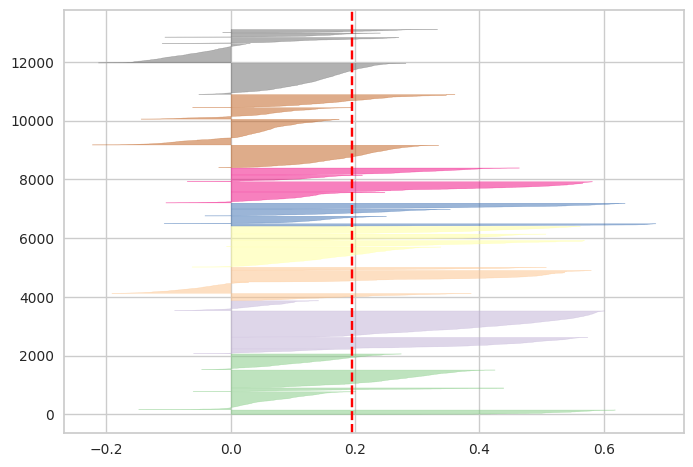

In [55]:
visualizer.fit(tfidf_matrix.toarray())

- 군집의 그림을보면 군집 자체는 괜찮게 되었으나 평균값이 0.2부근에 있어 잘못된 군집이 이루어졌을 가능성이 높다.
- 음수값이 나와 중복된 군집도 존재하여 정규화 또는 전처리를 통해 재군집화를 하는 것이 좋아보인다.